# Desafio 1

Para esse desafio, vamos trabalhar com o data set [Black Friday](https://www.kaggle.com/mehdidag/black-friday), que reúne dados sobre transações de compras em uma loja de varejo.

Vamos utilizá-lo para praticar a exploração de data sets utilizando pandas. Você pode fazer toda análise neste mesmo notebook, mas as resposta devem estar nos locais indicados.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Set up_ da análise

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [44]:
black_friday = pd.read_csv(r'black_friday.csv')

## Inicie sua análise a partir daqui

In [45]:
black_friday.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


É possível observar que as colunas `Product_Category_2` e `Product_Category_3` tem alguns objetos nulos, vamos ver qual a porcentagem desses dados faltantes.

In [46]:
missing_data_summary = pd.DataFrame({'columns': black_friday.columns, 'types': black_friday.dtypes, 
                                     'missing (%)': black_friday.isnull().mean().round(4) * 100})
missing_data_summary

,columns,types,missing (%)
User_ID,User_ID,int64,0.00
Product_ID,Product_ID,object,0.00
Gender,Gender,object,0.00
Age,Age,object,0.00
Occupation,Occupation,int64,0.00
City_Category,City_Category,object,0.00
Stay_In_Current_City_Years,Stay_In_Current_City_Years,object,0.00
Marital_Status,Marital_Status,int64,0.00
Product_Category_1,Product_Category_1,int64,0.00
Product_Category_2,Product_Category_2,float64,31.06


De imediato podemos observar que a porcentagem de dados faltantes de produtos na categoria 3 é de 69%. Ainda não sabemos o impacto que esses dados faltantes teriam em um possível modelo..

## Questão 1

Quantas observações e quantas colunas há no dataset? Responda no formato de uma tuple `(n_observacoes, n_colunas)`.

In [47]:
def q1():
    # Retorne aqui o resultado da questão 1.
    return black_friday.shape

## Questão 2

Há quantas mulheres com idade entre 26 e 35 anos no dataset? Responda como um único escalar.

In [48]:
def q2():
    # Retorne aqui o resultado da questão 2.
    return len(black_friday[(black_friday['Gender']=='F') & (black_friday['Age']=='26-35')])

## Questão 3

Quantos usuários únicos há no dataset? Responda como um único escalar.

In [49]:
def q3():
    # Retorne aqui o resultado da questão 3.
    return black_friday['User_ID'].nunique()

## Questão 4

Quantos tipos de dados diferentes existem no dataset? Responda como um único escalar.

In [50]:
def q4():
    # Retorne aqui o resultado da questão 4.
    return black_friday.dtypes.unique().size

## Questão 5

Qual porcentagem dos registros possui ao menos um valor null (`None`, `ǸaN` etc)? Responda como um único escalar entre 0 e 1.

In [51]:
def q5():
    # Retorne aqui o resultado da questão 5.
    return (len(black_friday) -len(black_friday.dropna())) / len(black_friday)

## Questão 6

Quantos valores null existem na variável (coluna) com o maior número de null? Responda como um único escalar.

In [52]:
def q6():
    # Retorne aqui o resultado da questão 6.
    return int(black_friday.isnull().sum().max())

## Questão 7

Qual o valor mais frequente (sem contar nulls) em `Product_Category_3`? Responda como um único escalar.

In [53]:
def q7():
    # Retorne aqui o resultado da questão 7.
    return black_friday['Product_Category_3'].mode()[0]

## Questão 8

Qual a nova média da variável (coluna) `Purchase` após sua normalização? Responda como um único escalar.

Antes de inciarmos vamos olhar como é a distribuição da nossa variável `Purchase` antes da normalização.

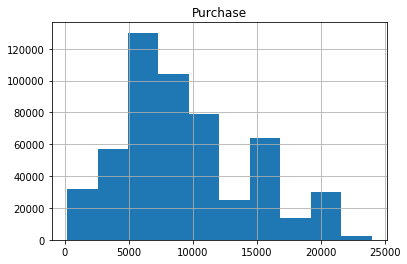

In [54]:
black_friday.hist(column='Purchase');

Podemos ver que há uma concentração de valores logo após 5000 (moda) e depois disso temos uns picos entre 15000 e 1600 e posteriormente em 2000.

In [55]:
def q8():
    # Retorne aqui o resultado da questão 8.
    
    _min = black_friday['Purchase'].min()
    _max = black_friday['Purchase'].max()
    _norm = (black_friday['Purchase'] - _min)/(_max-_min)
    

    return float(_norm.mean())

A normalização redimensiona os valores em um intervalo de `[0,1]`. Isso pode ser útil em alguns casos em que todos os parâmetros precisam ter a mesma escala positiva. No entanto, os outliers do conjunto de dados são perdidos. Assim, 1. A normalização torna o treinamento menos sensível à escala de recursos, para que possamos resolver melhor os coeficientes e é dada pela seguinte fórmula:

<center>$\LARGE X_{changed} = {X - X_{min} \over X_{max} - X_{min}}$</center>

 Vamos visualizar a distribuição da nossa variável `Purchase_norm` após a normalização.

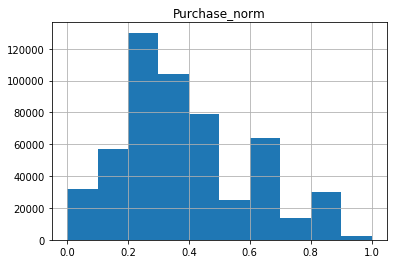

In [56]:
df = pd.DataFrame({'Purchase_norm' : (black_friday['Purchase'] - 
                                      black_friday['Purchase'].min())/(black_friday['Purchase'].max() - 
                                                                       black_friday['Purchase'].min())})
df.hist(column='Purchase_norm');

Todos os valores agora estão entre `0` e `1`, e caso houvessem outliers ele teriam desaparecido Nossos recursos agora são mais consistentes entre si, o que nos permitirá avaliar melhor a produção de nossos futuros modelos. Além disso, se usássemos algoritmos nesse conjunto de dados antes de normalizarmos, seria difícil (potencialmente não possível) convergir os vetores por causa dos problemas de dimensionamento. A normalização torna os dados mais condicionados à convergência.

## Questão 9

Quantas ocorrências entre -1 e 1 inclusive existem da variáel `Purchase` após sua padronização? Responda como um único escalar.

In [57]:
def q9():
    # Retorne aqui o resultado da questão 9.

    _mean = black_friday["Purchase"].mean()
    _std = black_friday["Purchase"].std()
    _stand = (black_friday['Purchase'] - _mean)/(_std)
    
    return int(_stand[_stand.between(-1,1)].count())

A padronização redimensiona os dados para ter uma média ($\mu$) de 0 e desvio padrão ($\sigma$) de 1 (variação unitária). A padronização  por sua vez, tende a tornar o processo de treinamento mais uniforme, porque a condição numérica dos problemas de otimização é aprimorada, e é dada pela seguinte fórmula:

<center>$\LARGE X_{changed} = {X - \mu \over \sigma}$</center>

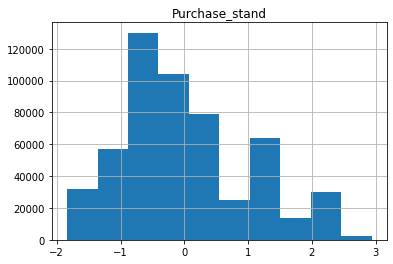

In [58]:
df['Purchase_stand'] = (black_friday["Purchase"] - black_friday["Purchase"].mean())/(black_friday["Purchase"].std())
df.hist(column='Purchase_stand');

A ideia da padronização é fazer com que ao executarmos modelos (regressão logística, SVMs, perceptrons, redes neurais etc.), os pesos estimados serão atualizados de maneira semelhante e não utilizará taxas diferentes durante o processo de criação. Isso fornecerá resultados mais precisos quando os dados forem padronizados pela primeira vez.

## Questão 10

Podemos afirmar que se uma observação é null em `Product_Category_2` ela também o é em `Product_Category_3`? Responda com um bool (`True`, `False`).

Inicialmente `não`. Não existe uma relação direta entre ambas as colunas que indique que quando há ocorrencia de um valor nulo em `Product_Category_2` o mesmo ocorra em `Product_Category_3`. Em resumo para cada ocorrência de null em `Product_Category_2` existe ao menos uma ocorrência não nula em `Product_Category_3`.

In [59]:
black_friday[['Product_Category_2', 'Product_Category_3']].sample(5)

,Product_Category_2,Product_Category_3
19133,17.0,NaN
65045,NaN,NaN
498368,4.0,14.0
108004,2.0,15.0
517532,NaN,NaN


Um outro ponto, conforme vimos em nosso dataframe que sumariza os dados nulos, a porcentagem de dados nulos em `Product_Category_3` é cerca de duas vezes mais do que em `Product_Category_2`

In [60]:
missing_data_summary.T[['Product_Category_2', 'Product_Category_3']]

,Product_Category_2,Product_Category_3
columns,Product_Category_2,Product_Category_3
types,float64,float64
missing (%),31.06,69.44


In [61]:
def q10():
    # Retorne aqui o resultado da questão 10.
    category_2 = black_friday[black_friday['Product_Category_2'].isna()]
    category_3 = category_2[category_2['Product_Category_3'].isna()]

    return category_2.equals(category_3)